<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


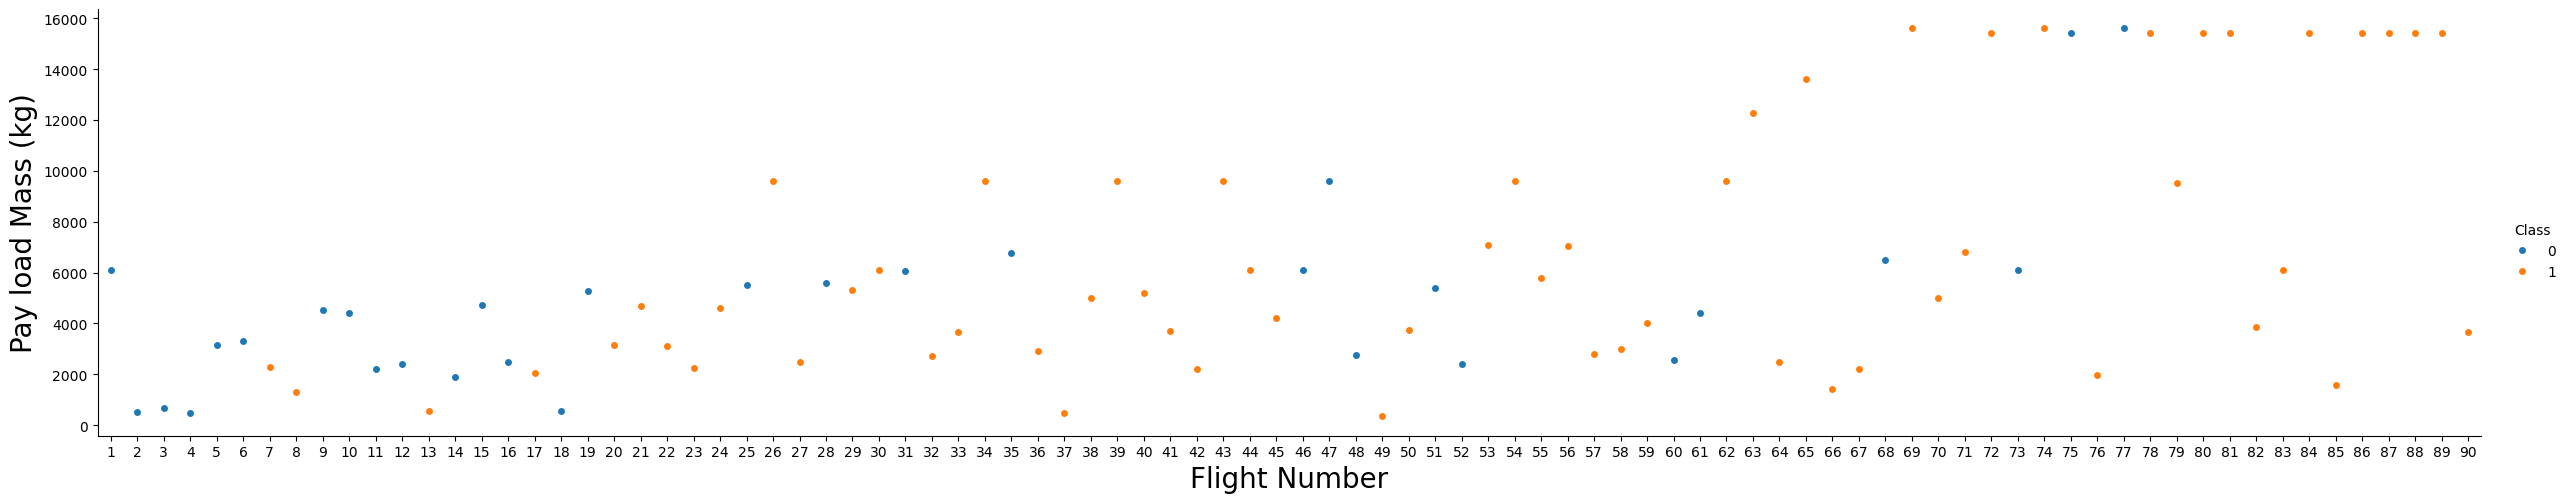

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


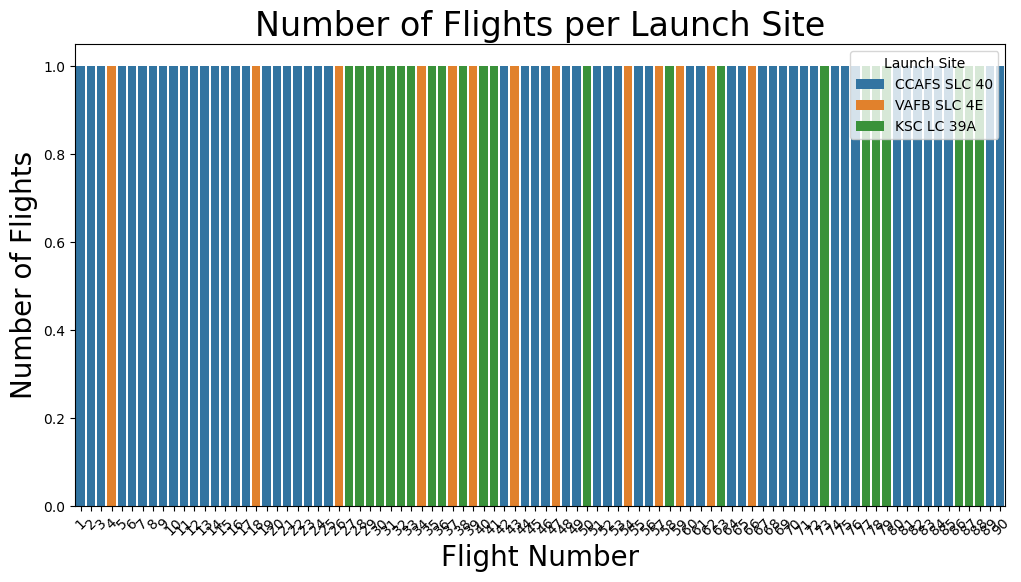

In [6]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Count plot for Flight Number vs Launch Site
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="FlightNumber", hue="LaunchSite")
plt.title("Number of Flights per Launch Site", fontsize=24)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Number of Flights", fontsize=20)
plt.legend(title='Launch Site')
plt.xticks(rotation=45)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


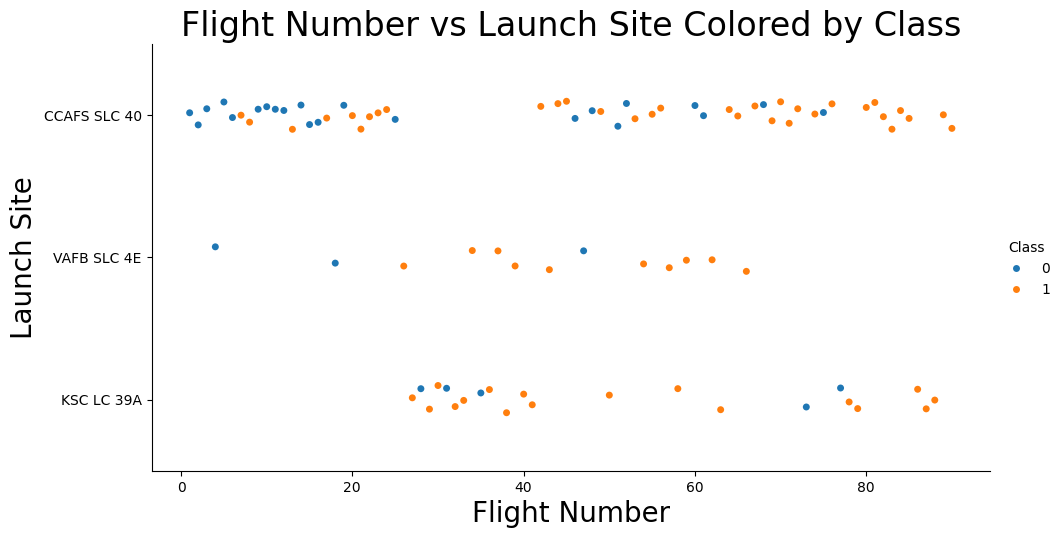

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Scatter plot using catplot
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", kind="strip", aspect=2)
plt.title("Flight Number vs Launch Site Colored by Class", fontsize=24)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


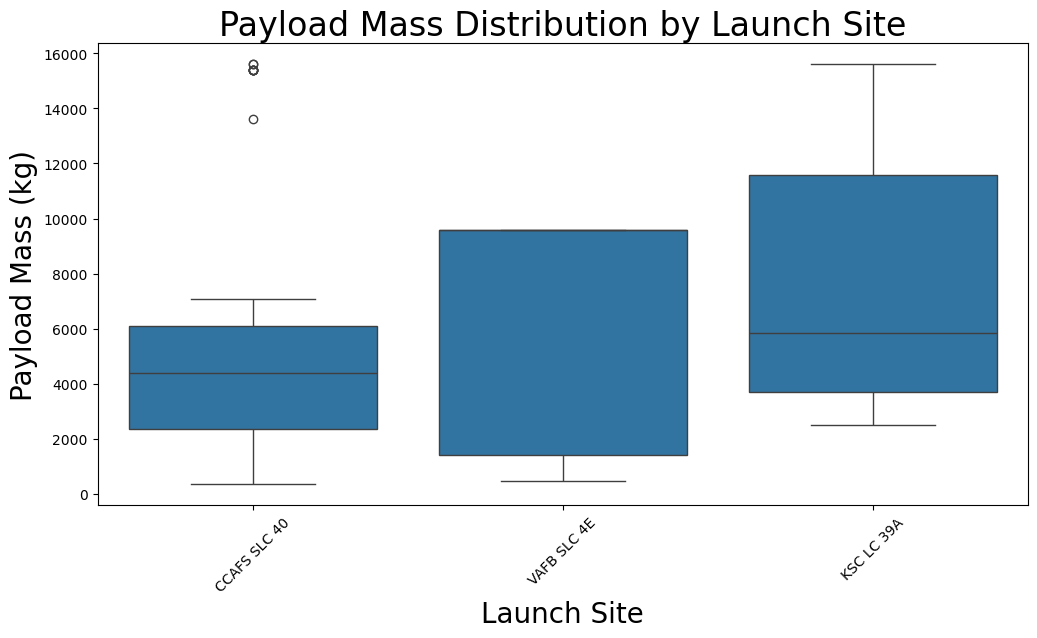

In [8]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Box plot for PayloadMass vs LaunchSite
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="LaunchSite", y="PayloadMass")
plt.title("Payload Mass Distribution by Launch Site", fontsize=24)
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.xticks(rotation=45)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


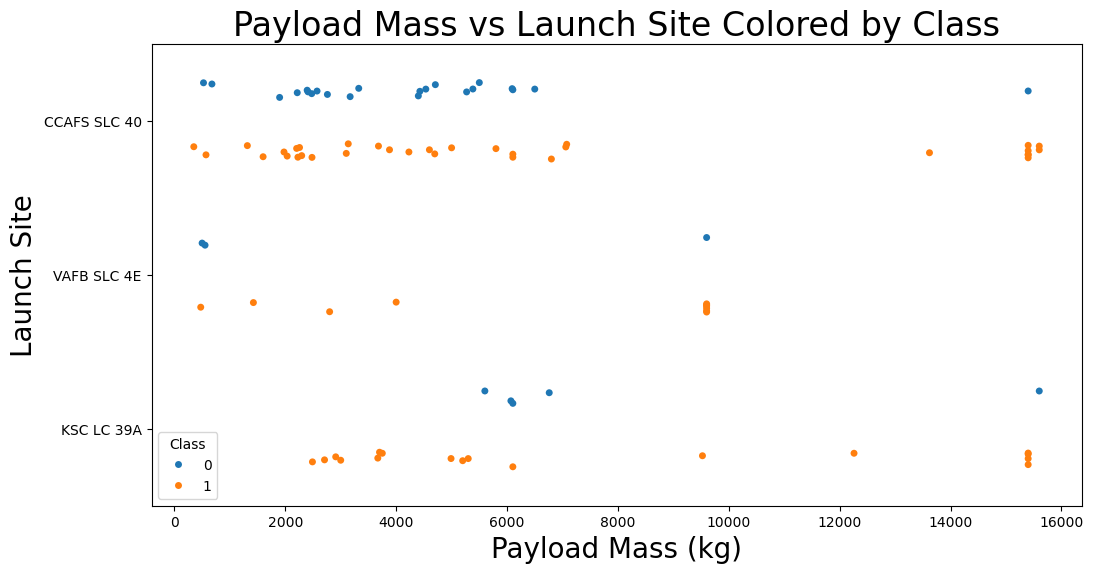

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Scatter plot using stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", jitter=True, dodge=True)
plt.title("Payload Mass vs Launch Site Colored by Class", fontsize=24)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.legend(title='Class')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-12-d7ddcd02668a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rates, x='Orbit', y='Success Rate',palette='viridis')


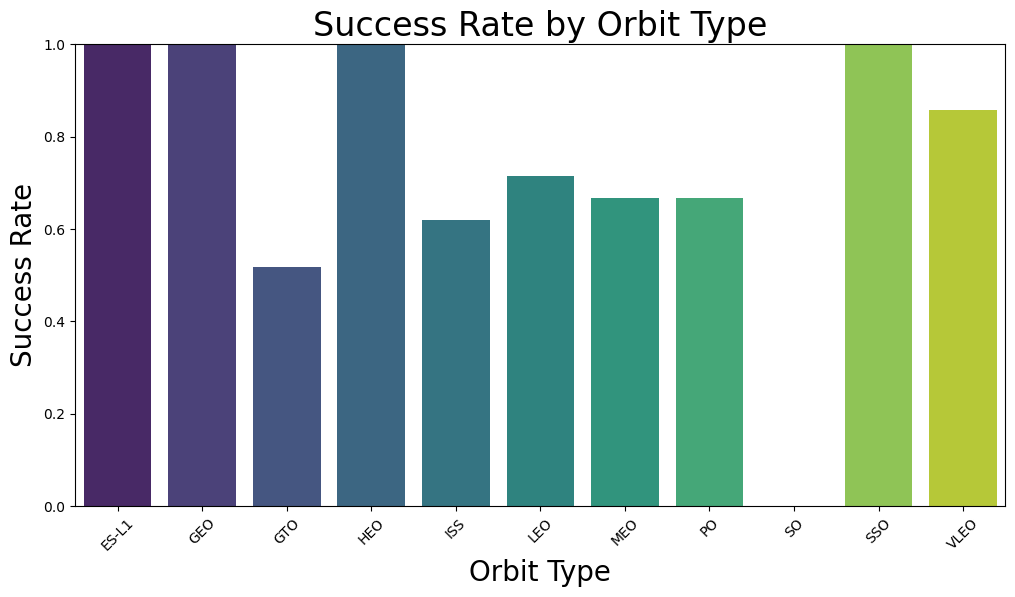

In [12]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Calculate success rate for each orbit type
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename columns for clarity
success_rates.columns = ['Orbit', 'Success Rate']

# Plotting the success rate
plt.figure(figsize=(12, 6))
sns.barplot(data=success_rates, x='Orbit', y='Success Rate',palette='viridis')
plt.title("Success Rate by Orbit Type", fontsize=24)
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-14-3b0d1bc62427>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rates, x='Orbit', y='Success Rate', palette='viridis')


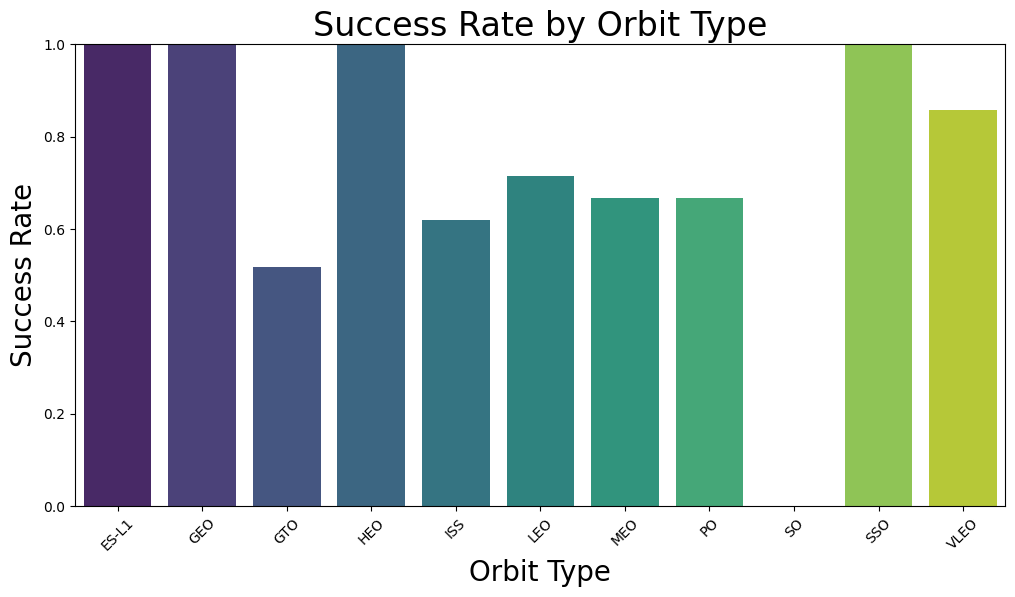

In [14]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate success rate for each orbit type
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename columns for clarity
success_rates.columns = ['Orbit', 'Success Rate']

# Plotting the success rate
plt.figure(figsize=(12, 6))
sns.barplot(data=success_rates, x='Orbit', y='Success Rate', palette='viridis')
plt.title("Success Rate by Orbit Type", fontsize=24)
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


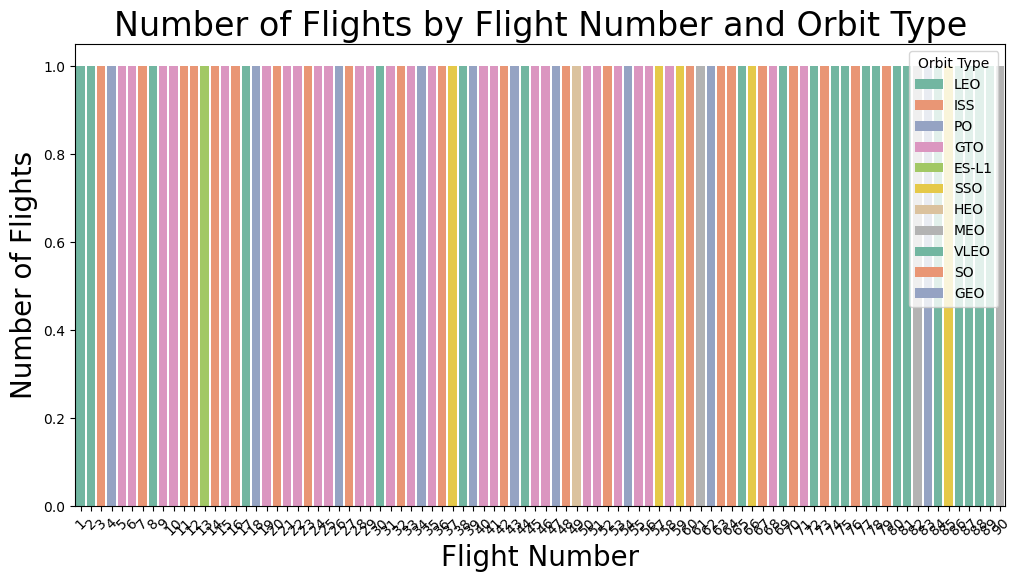

In [15]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Count plot for FlightNumber vs Orbit type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FlightNumber', hue='Orbit', palette='Set2')
plt.title("Number of Flights by Flight Number and Orbit Type", fontsize=24)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Number of Flights", fontsize=20)
plt.legend(title='Orbit Type')
plt.xticks(rotation=45)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


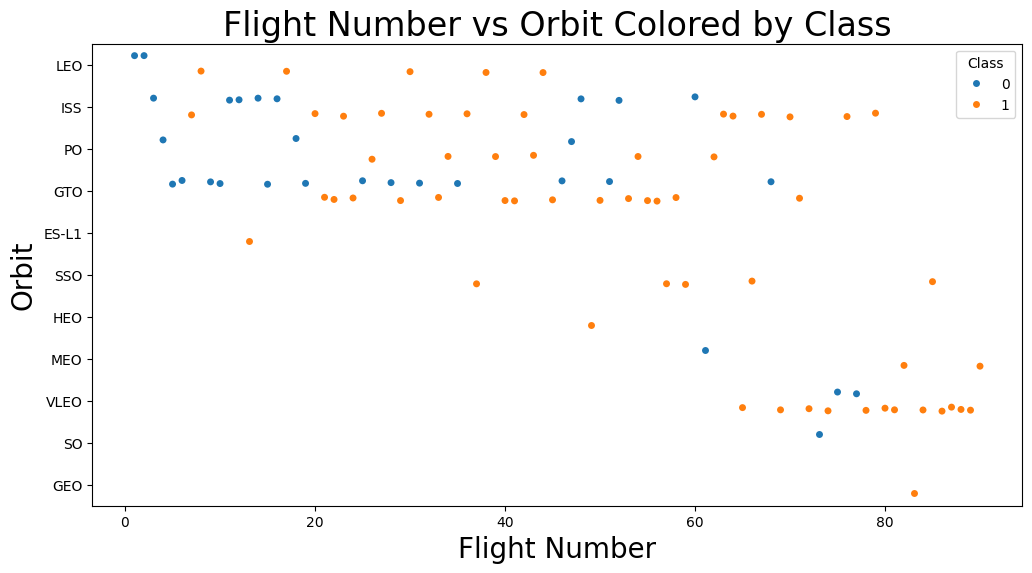

In [16]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Scatter plot using stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='FlightNumber', y='Orbit', hue='Class', jitter=True, dodge=True)
plt.title("Flight Number vs Orbit Colored by Class", fontsize=24)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.legend(title='Class')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


<ipython-input-17-0081569f00b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Orbit', y='PayloadMass', palette='Set2')


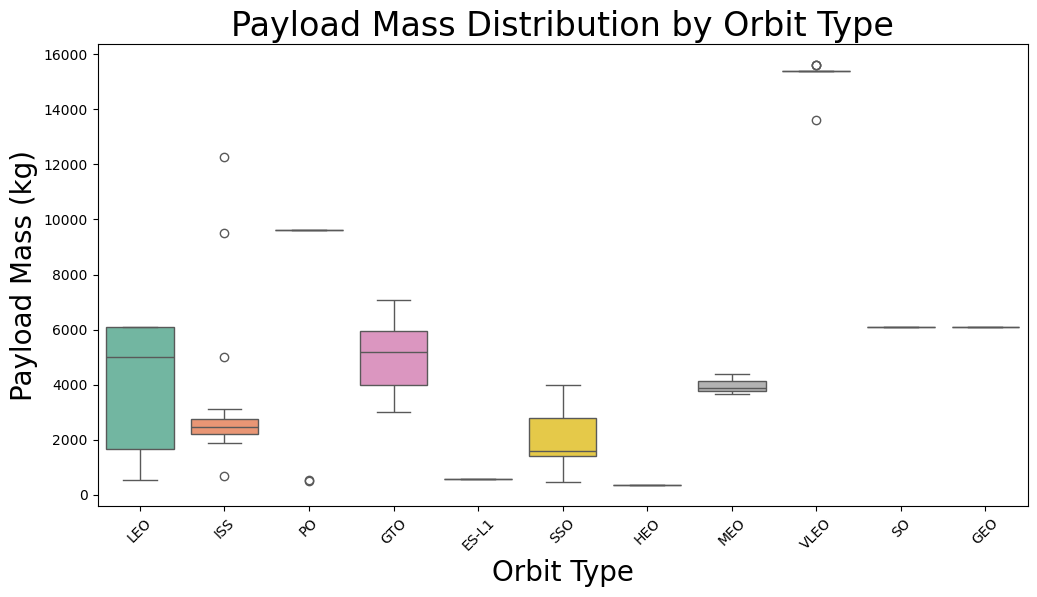

In [17]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Box plot for PayloadMass vs Orbit type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Orbit', y='PayloadMass', palette='Set2')
plt.title("Payload Mass Distribution by Orbit Type", fontsize=24)
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


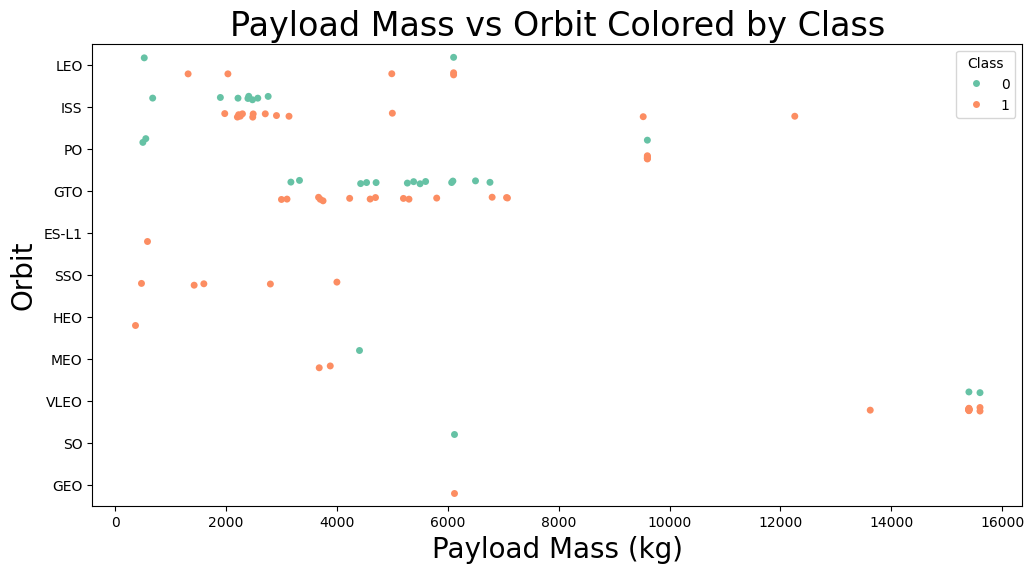

In [18]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Scatter plot using stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='PayloadMass', y='Orbit', hue='Class', jitter=True, dodge=True, palette='Set2')
plt.title("Payload Mass vs Orbit Colored by Class", fontsize=24)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.legend(title='Class')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


<ipython-input-19-8c88c7d3bae9>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o', palette='Set2')


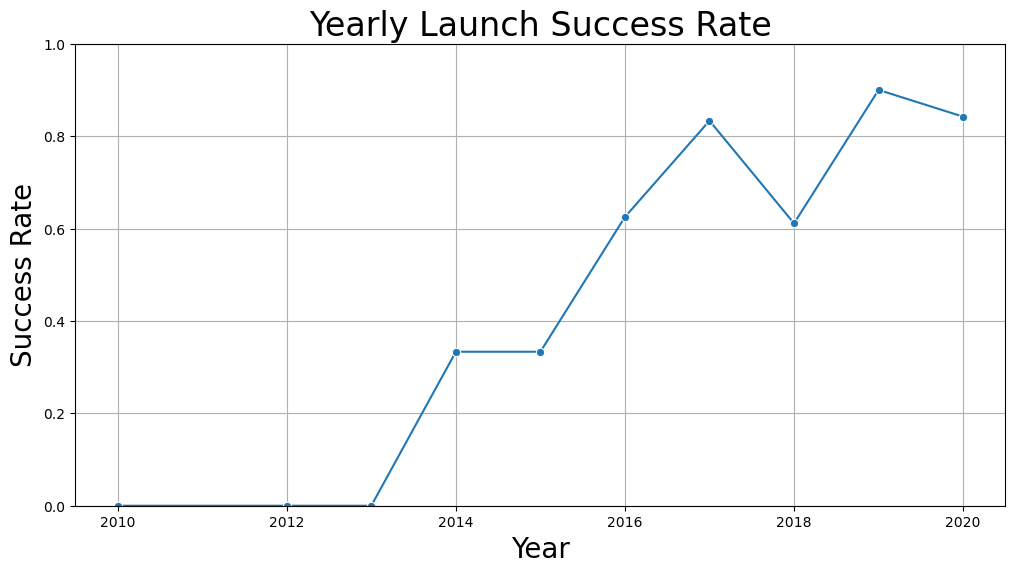

In [19]:
### TASK  6: Visualize the launch success yearly trend
# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Calculate the success rate for each year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the yearly success trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o', palette='Set2')
plt.title("Yearly Launch Success Rate", fontsize=24)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
plt.grid(True)
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [24]:
# A function to Extract years from the date 
# Extract years from the Date column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Verify the extraction
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


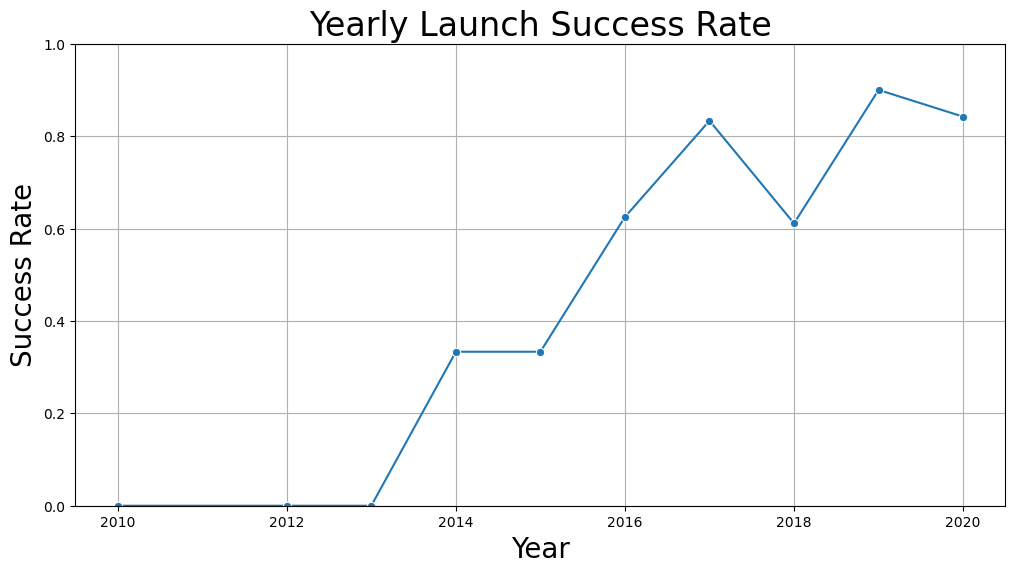

In [25]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Calculate the success rate for each year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the yearly success trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o')
plt.title("Yearly Launch Success Rate", fontsize=24)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [26]:
## Features Engineering
# Step 1: Extract Year from Date (already done)
df['Year'] = df['Date'].dt.year

# Step 2: Create a New Feature for Success Rate by Orbit
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()
success_rates.columns = ['Orbit', 'SuccessRateByOrbit']
df = pd.merge(df, success_rates, on='Orbit', how='left')

# Step 3: Calculate Cumulative Success Rate by Year
df['CumulativeSuccessRate'] = df.groupby('Year')['Class'].cumsum() / df.groupby('Year').cumcount()

# Step 4: Categorize Payload Mass
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
labels = ['0-1k', '1-2k', '2-3k', '3-4k', '4-5k', '5-6k', '6-7k', '7-8k', '8-9k', '9-10k']
df['PayloadMassCategory'] = pd.cut(df['PayloadMass'], bins=bins, labels=labels)

# Step 5: Extract Month from Date
df['Month'] = df['Date'].dt.month

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,ReusedCount,Serial,Longitude,Latitude,Class,Year,SuccessRateByOrbit,CumulativeSuccessRate,PayloadMassCategory,Month
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,0,B0003,-80.577366,28.561857,0,2010,0.714286,NaN,6-7k,6
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,...,0,B0005,-80.577366,28.561857,0,2012,0.714286,NaN,0-1k,5
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,...,0,B0007,-80.577366,28.561857,0,2013,0.619048,NaN,0-1k,3
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,B1003,-120.610829,34.632093,0,2013,0.666667,0.0,0-1k,9
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,...,0,B1004,-80.577366,28.561857,0,2013,0.518519,0.0,3-4k,12


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [28]:
### TASK  7: Create dummy variables to categorical columns
# List of categorical columns to create dummy variables for
categorical_columns = ['LaunchSite', 'Orbit', 'PayloadMassCategory']

# Create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataframe with dummy variables
df_dummies.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,...,Orbit_VLEO,PayloadMassCategory_1-2k,PayloadMassCategory_2-3k,PayloadMassCategory_3-4k,PayloadMassCategory_4-5k,PayloadMassCategory_5-6k,PayloadMassCategory_6-7k,PayloadMassCategory_7-8k,PayloadMassCategory_8-9k,PayloadMassCategory_9-10k
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,NaN,...,0,0,0,0,0,0,1,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,NaN,...,0,0,0,1,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [29]:
# HINT: Use get_dummies() function on the categorical columns
# List of categorical columns to create dummy variables for
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use get_dummies() function to apply OneHotEncoder to the specified columns
features_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the resulting dataframe
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
### TASK  8: Cast all numeric columns to `float64`
# Cast all numeric columns to float64
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the data types to verify
print(features_one_hot.dtypes)

# Display the first few rows of the resulting dataframe
features_one_hot.head()

FlightNumber             float64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Outcome                   object
                       ...      
Serial_B1056             float64
Serial_B1058             float64
Serial_B1059             float64
Serial_B1060             float64
Serial_B1062             float64
Length: 87, dtype: object


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6104.959412,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [31]:
# HINT: use astype function
# Cast all numeric columns to float64
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Verify the data types
print(features_one_hot.dtypes)

# Display the first few rows of the resulting dataframe
features_one_hot.head()

FlightNumber             float64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Outcome                   object
                       ...      
Serial_B1056             float64
Serial_B1058             float64
Serial_B1059             float64
Serial_B1060             float64
Serial_B1062             float64
Length: 87, dtype: object


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6104.959412,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
